In [43]:
# Colab sadece tf 2.x 'içerir.Aslında bu yazdığımız scriptin hiç bir önemi yok ancak adettendir. Yazalım :)
try:
  %tensorflow_version 2.x
except Exception:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [44]:
# İlgili kütüphanelerimizi içeriye aktarıyoruz.

import tensorflow as tf
from keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dropout,Dense,Lambda
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random

In [33]:
# tfds içerisinden mnist veri setimizimi aldık. train ve test olarak split ettik.

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [45]:
#@title Görselleştiriciyi Başlat.

plt.rc('font', size=20)
plt.rc('figure', figsize=(15,3))

def rakamlari_goster(inputs, outputs, ground_truth, epoch, n=10):
  plt.clf()

  plt.yticks([])
  plt.grid(None)
  inputs = np.reshape(inputs, [n,28,28])
  inputs = np.swapaxes(inputs,0,1)
  inputs = np.reshape(inputs, [28,28*n])
  plt.imshow(inputs)
  plt.xticks([28*x+14 for x in range(n)], outputs)
  for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if outputs[i] == ground_truth[i]: 
            t.set_color('green') 
        else: 
            t.set_color('red')
  plt.grid(None)

In [46]:
GIF_PATH = './animation.gif'

In [51]:
# özel bir callbacks olan VisCallback sınıfımızı istediğimiz gibi tanımlayabiliriz.
# burada değinmek istediğimiz konu tensorflow içerisinde yerleşik olarak bulunan callbacks'lerden ( model_check_point, early_stopping gibi vs.vs)
# farklı olarak özel olarak da callbacks tanımlayarak kullanabiliyor olmamızdır.

class VisCallback(tf.keras.callbacks.Callback):
    def __init__(self, inputs, ground_truth, display_freq=10, n_samples=10):
        super().__init__()
        self.inputs = inputs
        self.ground_truth = ground_truth
        self.images = []
        self.display_freq = display_freq
        self.n_samples = n_samples

    def on_epoch_end(self, epoch, logs=None):
        # rastgele örnek veriler.
        indexes = np.random.choice(len(self.inputs), size=self.n_samples)
        X_test, y_test = self.inputs[indexes], self.ground_truth[indexes]
        predictions = np.argmax(self.model.predict(X_test), axis=1)

        # rakanmları çiz.
        rakamlari_goster(X_test, predictions, y_test, epoch, n=self.display_freq)

        # rakamları kaydet.
        import io
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        image = Image.open(buf)
        self.images.append(np.array(image))

        # her epoch'ta 'display_freq' sayısının rakamlarını görüntüleme.
        if epoch % self.display_freq == 0:
            plt.show()

    def on_train_end(self, logs=None):
        import imageio
        imageio.mimsave(GIF_PATH, self.images, fps=1)

In [52]:
# basit olarak bir sıralı (sequence) model sınıfımızı tanımlayalım.

def modelimiz():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, activation='linear', input_dim=784))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [53]:
model = modelimiz() # model sınıfımızdan model nesnemizi yaratalım. oop candır :)
model.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=0,
          callbacks=[VisCallback(x_test, y_test)])

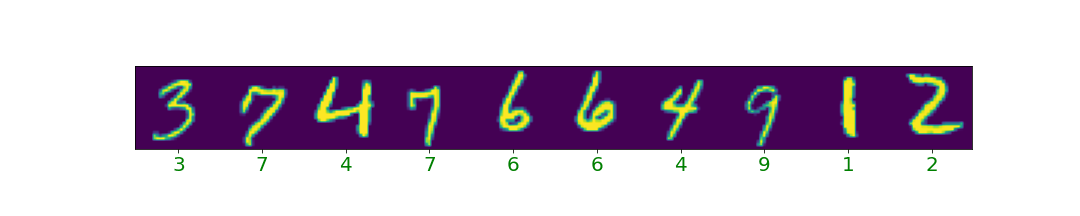

In [55]:
SCALE = 60

from IPython.display import Image as IPyImage
IPyImage(GIF_PATH, format='png', width=15 * SCALE, height=3 * SCALE) 